In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as skl
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
# from reparo import CDI, FRNNI, HotDeckImputation, KNNImputer, PMM, SICE, MICE


In [14]:
df = pd.read_csv('kidney_disease.csv')
df.info()
missing_values = df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [16]:
full_name_columns = ['id','age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

df.columns = full_name_columns
df.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


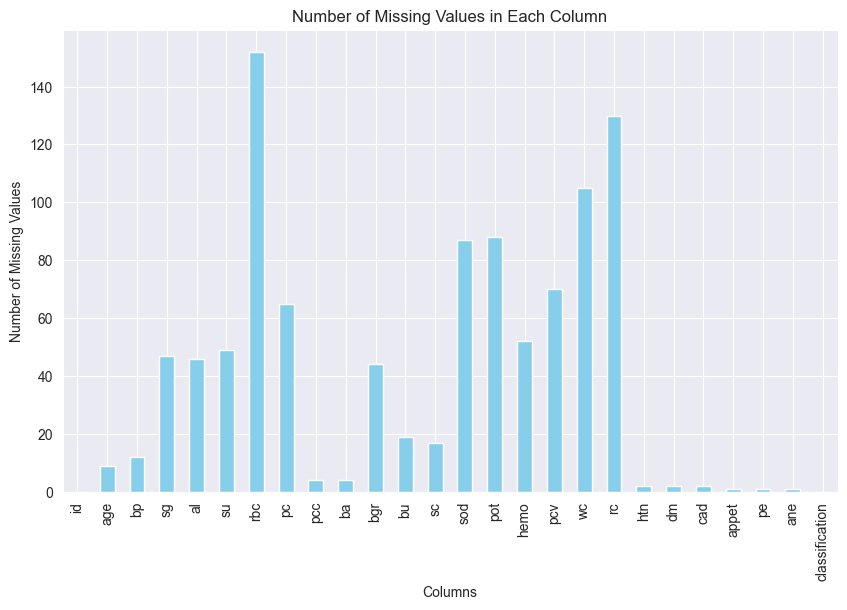

In [17]:
missing_values.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Number of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

In [35]:
from sklearn.preprocessing import LabelEncoder
# Список категориальных признаков
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Преобразование категориальных признаков в числовую форму и замена значений в DataFrame
label_encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

In [36]:
df.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,...,32,72,34,1,4,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,...,26,56,49,0,3,1,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,19,70,49,0,4,1,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,20,62,19,1,3,1,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,23,68,27,0,3,1,0,0,0,0


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
blood_pressure,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
specific_gravity,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
albumin,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
sugar,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
red_blood_cells,400.0,1.262500,0.655491,0.000,1.00,1.00,2.00,2.000
pus_cell,400.0,0.972500,0.593823,0.000,1.00,1.00,1.00,2.000
pus_cell_clumps,400.0,0.125000,0.360138,0.000,0.00,0.00,0.00,2.000
bacteria,400.0,0.075000,0.299331,0.000,0.00,0.00,0.00,2.000


In [38]:
# Split the Data Set into the train and test sets

X = df.drop(['class'], axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
from reparo import CDI, FRNNI, HotDeckImputation, KNNImputer, PMM, SICE, MICE

In [28]:
#Create an instance of the SimpleImputer with the strategy
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')
imputer_most_frequent = SimpleImputer(strategy='most_frequent')
imputer_constant = SimpleImputer(strategy='constant', fill_value=0)

In [29]:
# Create instances of imputation algorithms
cdi_imputer = CDI()
frnni_imputer = FRNNI()
hotdeck_imputer = HotDeckImputation()
knn_imputer = KNNImputer()
pmm_imputer = PMM()
sice_imputer = SICE()
mice_imputer = MICE()

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
imputers = [imputer_mean, imputer_median, imputer_most_frequent, imputer_constant,
            cdi_imputer, frnni_imputer, hotdeck_imputer, knn_imputer,
            pmm_imputer, sice_imputer, mice_imputer]

# List of prediction algorithms
models = [
    LogisticRegression(),
    GaussianNB(),
    DecisionTreeClassifier(),
    #RandomForestClassifier()
]

results = []
for imputer in imputers:
    # Impute missing values on the training set
    X_train_imputed = imputer.fit_transform(X_train_scaled)

    # Impute missing values on the test set
    X_test_imputed = imputer.transform(X_test_scaled)

    for model in models:
        # Train the model on the imputed training set
        model.fit(X_train_imputed, y_train)

        # Make predictions on the imputed test set
        predictions = model.predict(X_test_imputed)


        accuracy = accuracy_score(y_test, predictions)
        results.append([type(imputer).__name__, type(model).__name__, accuracy])

results_df = pd.DataFrame(results, columns=['Imputation Algorithm', 'Prediction Algorithm', 'Accuracy'])
print(results_df)

c:\users\jija0\appdata\local\programs\python\python39\lib\site-packages\reparo\PMM.py:80: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  beta_zviozdacika = np.random.multivariate_normal(


   Imputation Algorithm    Prediction Algorithm  Accuracy
0         SimpleImputer      LogisticRegression  0.991667
1         SimpleImputer              GaussianNB  0.908333
2         SimpleImputer  DecisionTreeClassifier  0.983333
3         SimpleImputer      LogisticRegression  0.991667
4         SimpleImputer              GaussianNB  0.900000
5         SimpleImputer  DecisionTreeClassifier  0.966667
6         SimpleImputer      LogisticRegression  0.983333
7         SimpleImputer              GaussianNB  0.900000
8         SimpleImputer  DecisionTreeClassifier  0.991667
9         SimpleImputer      LogisticRegression  0.991667
10        SimpleImputer              GaussianNB  0.908333
11        SimpleImputer  DecisionTreeClassifier  0.983333
12                  CDI      LogisticRegression  0.991667
13                  CDI              GaussianNB  0.908333
14                  CDI  DecisionTreeClassifier  0.983333
15                FRNNI      LogisticRegression  0.991667
16            

Методы импутации пропущенных значений показали лучшую точность для модели LogisticRegression 99%
В целом, использование методов импутации пропущенных значений совместно с моделями классификации привело к высокой производительности всех моделей, с точностью не менее 90%, что показывает хороший результат